# Tutorial: handle the pubcrypt project

Simple tutorial to manipulate the pubcrypt project. We're giving you an overview of the all project.

First, what is the purpose of the project ? Pubcrypt is like my laboratory for the RSA cryptosystem, I'm looking at efficent way to implement it in python and later in C.
For now, I only have implemented a keypair generator but I'm also planning to implement pkcs and oaep scheme. I'm doing this while learning.


## Summary
You have many files and folders so there is a summary:

``` 
| pubcrypt: the main python module
| study_paper: where you can find all the PDF I used for my project and the notebook I've made to explain how I proceed for my module
| statistic: a python module to make graph about the efficency of pubcrypt with matplotlib
README: a simple recap of all the pubcrypt's function, my sources and my social media
example.py: it is like an application where you can handle more easily my two modules
tutorial.ipynb: where you are actually !
``` 


## Pubcrypt

If you want to generate a keypair, recover your primes factor from the public and private key, encrypt/decrypt a message, everything is available in the rsa.py file.
Use the function from example.py or import directly the module from your code:

In [11]:
from pubcrypt.number.util import int_to_bytes
from pubcrypt import rsa

#Here I'm generating a 2048 bit key, the default public exponent is 65537. The function return you public and private key: (n, e), d
n, e, d = rsa.generate(2048)
print (f"N={n}")
print (f"e={e}")
print (f"d={d}\n")


#You also can recover your prime factors
p, q = rsa.prime_recovery(n, e, d)
print (f"p = {p}")
print (f"q = {q}\n")


#And also use the primitive_exp function which allow you to perform encryption:
c = rsa.primitive_exp(10485444774072141414467428867414474974390185603861931877, e, n)

#And of course, decryption:
m = rsa.primitive_exp(c, d, n)

print (f"My message is: {int_to_bytes(m)}")

N=15057607762541187706770895362108128970673791090659302076792909933484139455526565216813237940048070656582524922040242986629162563317902559770967509953953026762763490144640361355333161578904771281132024506878342877001691173819422175213509422339507330686823462985472116399201852303323699166345662862680782910703389641656601759707950290325276318185941664806679779022428213399044341425114867708576318454672133702529692388430783655243379930187336874605124071228983602885360531563329729599973055770946816716308465332184690087525278434083630393425320610004198334564466039704932586549489152283893077783334861264589886753804097
e=65537
d=1828523908298885245957797438688642208418257875627692075898444751905542271645149599127335003827953222155607131727989895922733574319323855561549123822703742366776831962343719057119168811903407574971225674626413961374764777253183261080560824231944841711873972415122447447442634566061944547589330574982757996167523190678577677902984889098620256964398996488481261832555740133

## Statistic

In pubcrypt, I'm mainly using oriented object programmation because it is more easy to manipulate data. With my prime number generator, I can easily take all the variables necessary for the process and make graph with it for some evaluation. For example, I know how many number the generator had to test before finding a prime number.
So the point of this module is to use those object and make some graph with matplotlib so I can evaluate the efficency of my algorithms.
There is some examples: 

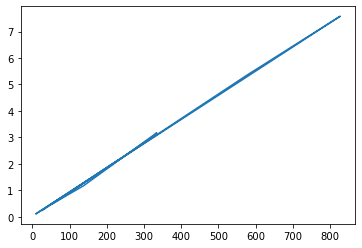

In [1]:
from statistic.evGeneration import * 

#Here I'm evaluating how many numbers I need to pick for generating 10 prime numbers with a 1024 bits size. 
#Note: as you can see, the actual algorithm isn't efficient, it isn't taking a regular amount of numbers. Instead It can go from less than 200 numbers to more than 900.
prime_number_evaluation(10, 1024)

#It measure the time it take to generate a prime number in function of the numbers the algorithm had to test
prime_number_evaluation_with_time(10, 1024)